## MSCA 32018 1 Natural Language Processing and Cognitive Computing

### Assignment 3

**Author: Targoon Siripanichpong**

You need to determine which articles (from Assignment Articles.zip) are similar to each other and which books (from Assignment Books.zip) are more similar to each other.  In order to accomplish this you need to create n-grams (a.k.a. shingles) and compare the similarity of the text using Jaccard distance.

Your final submission must include the following:

* Which articles / books were similar and which ones were dissimilar?
* A brief write-up explaining why and how you chose “n” for you analysis (for n-grams)
* Was the “n” identical or different for books vs. articles and why
* Visualize the selection of “n”
* Include all of your program codes (creating n-grams from text as well as selecting the “n” for analysis)

## Importing Libraries

In this notebook, we'll examine the impact of choosing n in our n-grams across two libraries of texts. Onelibrary is comprised of several full-length novels, while another consists of articles of varying lenghts. We'llﬁrst deﬁne several helper functions that will be re-used throughout this process (each one is commented).We'll then proceed to evaluate our choice of n, per library, and then ﬁnally, use that n-value to compare ourlibrary of texts and return Jaccard similarity values for the more similiar texts.

In [1]:
from __future__ import division
import nltk
import string
import os
from nltk.corpus import stopwords
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np

## Defining Functions

In [2]:
def ngram_compare_files(file1,file2,n):
    # Takes two files
    # hashes their n-grams into twos lists
    # calculates the intersection and union
    # of the two lists, and returns
    # Jacard similarity value
 
    stop = stopwords.words('english')
    f1 = open(file1)
    raw = f1.read()
    f1.close()
    f1_grams = nltk.ngrams(raw.split(),n)
    
    array_1 = []
    
    for gram in f1_grams:
        array_1.append(hash(gram))
    f2 = open(file2)
    raw = f2.read()
    f2.close()
    f2_grams = nltk.ngrams(raw.split(),n)
    
    array_2 = []
    
    for gram in f2_grams:
        array_2.append(hash(gram))
        
    intersection = len(list(set(array_1).intersection(array_2)))    
    union = len(set(array_1)) + len(set(array_2)) - intersection
    jacard_similarity = intersection / union
    return jacard_similarity


def pairs_of_files(directory):
    # returns combination of two files given
    # all files in a directory
    
    dir = os.listdir(directory)
    combo = combinations(dir, 2)
    return combo

def compare_files(directory,ngram_size,threshold):
    # compares all pairs of files in a directory
    # for similarity.
    # RETURNS: Dictionary, with key as
    # comma-separated string of two files
    # and value of similarity index as decimal
    # where similarity index is above threshold
    # value.
    
    compare_dictionary = {}
    
    ngram = ngram_size
    combo = pairs_of_files(directory)
    
    for i in combo:
        
        sim = ngram_compare_files(directory+str(i[0]),directory+str(i[1]),ngram)
        if sim > threshold:
            
            key = str(i[0]) + "," + str(i[1])
            value = sim
            compare_dictionary[key]=value
            
    return compare_dictionary            

## Choosing 'N'

In order to determine a proper N-value for a n-grams, we evaluate the impact of N over a range of 2 to 20.
We do this by repeating our similarity measure (Jaccardian similarity) for each N, and plotting similairity.

### Running for Books

In [3]:
dir = '../Data/'

In [4]:
x = []
y = []
yall = []

for n in range(2,20):
        
    books_comparison = compare_files(dir+'Assignment 3 Books/',ngram_size=n,threshold=-1)
    a = np.zeros(len(books_comparison))
    counter = 0
    for key, value in books_comparison.items():
        a[counter] = value
        counter +=1
    #print str(n) + ":" + str(a.mean())
    x.append(n)
    yall.append(a*100)
    y.append(a.mean()*100)

Plot the distributions

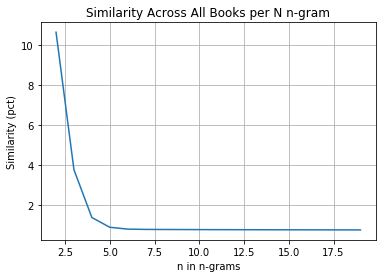

In [5]:
plt.plot(x,y, linestyle = '-')
#plt.plot(x,yall, linestyle = '--')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Similarity Across All Books per N n-gram')
plt.grid()
plt.show()

**N-Gram Selection for Books** 

As observed from the similarity plot across all books, books become more 'dissimilar' as the N increases. This is as expected because as N increases, the more unique the tokens would be, making it more difficult to make a comparison.

In this case, N for books are selected to be 4. This is where the similarity between books can still be observed while still not generalizing the token too much. When N=5 or more, it can be seen that the graph plateaus, and there is no meaningful separation when N>=5 as the tokens become very unique.

### Running for Articles

In [6]:
x = []
y = []
yall = []

for n in range(2,20):
    
    art_comparison = compare_files(dir+'Assignment 3 Articles/',ngram_size=n,threshold=-1)
    a = np.zeros(len(art_comparison))
    counter = 0
    for key, value in art_comparison.items():
        a[counter] = value
        counter +=1
    #print str(n) + ":" + str(a.mean())
    x.append(n)
    yall.append(a*100)
    y.append(a.mean()*100)

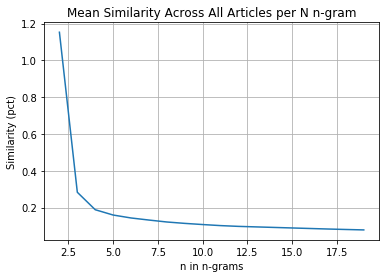

In [7]:
plt.plot(x,y, linestyle = '-')
#plt.plot(x,yall, linestyle = '--')
plt.xlabel('n in n-grams')
plt.ylabel('Similarity (pct)')
plt.title('Mean Similarity Across All Articles per N n-gram')
plt.grid()
plt.show()

**N-Gram Selection for Articles**

The similarity plot for articles is roughly the same as the plot for books. As Not a lot of difference is observed in the similarity when N >= 4, N is chosen to be equal to 3 in this case.

**Was the “n” identical or different for books vs. articles and why?**

N selection for Books are Articles are close (4 and 3 respectively), but not identical. 

As the books are more lengthy than articles, they are able to handle more unique tokens as there are more available tokens for comparison. Hence, it is not a surprise to see that N for books is larger than N for articles. 

## Books measuring similarity

After having our n for books chosen as 4, we'll examine the similairty of our set of books, and use a
threshold value of 2%. This threshold value will filter our any books with similarities below that value, in order
to allow us to focus on the most promininent combinations of books that are similar.

In [8]:
books_comparison = compare_files(dir+'Assignment 3 Books/',ngram_size=4,threshold=0.02)


for k,v in books_comparison.items():
    book1, book2 = k.split(',')
    similarity_index = v
    print ("1")
    print (str(book1) + " is similar to " + str(book2) + 
           " with a Similarity Index of " + '{percent:.3%}'.format(percent=similarity_index) +"\n" +"\n")

1
Hound_of_the_Baskervilles.txt is similar to Adventures_of_Sherlock_Holmes.txt with a Similarity Index of 2.444%


1
Hound_of_the_Baskervilles.txt is similar to Return_of_Sherlock_Holmes.txt with a Similarity Index of 2.430%


1
Adventures_of_Sherlock_Holmes.txt is similar to Return_of_Sherlock_Holmes.txt with a Similarity Index of 2.332%




**Checking the most frequent N-grams token for all books**

In [9]:
import pandas as pd

def four_gram_word_freq(directory):
    with open(directory, 'r') as file:
        text = file.read().replace('\n', '')

    n = 4
    fourgrams = nltk.ngrams(text.split(), n)

    #tokens = nltk.tokenize.word_tokenize(raw)
    tokens = nltk.word_tokenize(text)

    fdist_4 = nltk.FreqDist(fourgrams)
    fdist_df = pd.DataFrame(fdist_4.most_common(),
                        columns=['Word', 'Frequency'])

    return(fdist_df.head(n=15))

In [10]:
four_gram_word_freq(dir+'Assignment 3 Books/3boat10.txt')

,Word,Frequency
0,"(the, bottom, of, the)",12
1,"(at, the, bottom, of)",11
2,"(in, the, middle, of)",10
3,"(the, middle, of, the)",10
4,"(said, it, was, a)",9
5,"(and, Harris, and, I)",8
6,"(a, good, deal, of)",8
7,"(and, George, and, I)",8
8,"(the, end, of, the)",6
9,"(at, the, rate, of)",6


In [11]:
four_gram_word_freq(dir+'Assignment 3 Books/Adventures_of_Sherlock_Holmes.txt')

,Word,Frequency
0,"(have, no, doubt, that)",10
1,"(I, have, no, doubt)",9
2,"(to, me, to, be)",8
3,"(of, a, man, who)",8
4,"(I, do, not, think)",8
5,"(I, think, that, I)",8
6,"(Project, Gutenberg, Literary, Archive)",7
7,"(The, Adventure, of, the)",6
8,"(from, one, to, the)",6
9,"(up, and, down, the)",6


In [12]:
four_gram_word_freq(dir+'Assignment 3 Books/Return_of_Sherlock_Holmes.txt')

,Word,Frequency
0,"(at, the, end, of)",12
1,"(The, Adventure, Of, The)",11
2,"(so, far, as, I)",9
3,"(to, me, to, be)",8
4,"(I, am, sure, that)",8
5,"(I, have, no, doubt)",8
6,"(have, no, doubt, that)",7
7,"(do, you, make, of)",7
8,"(the, scene, of, the)",7
9,"(I, am, convinced, that)",7


In [13]:
four_gram_word_freq(dir+'Assignment 3 Books/Hound_of_the_Baskervilles.txt')

,Word,Frequency
0,"(Project, Gutenberg, Literary, Archive)",7
1,"(do, you, make, of)",6
2,"(the, death, of, Sir)",6
3,"(death, of, Sir, Charles)",6
4,"(the, Project, Gutenberg, Literary)",6
5,"(on, either, side, of)",5
6,"(Sir, Henry, and, I)",5
7,"(that, I, could, not)",5
8,"(have, no, doubt, that)",5
9,"(the, terms, of, this)",5


**Which books are similar/dissimilar?**

"Three Men in a Boat" is considered different from the Sherlock Holmes books based on the similarity index. The books that are similar to each other are the three Sherlock Holmes books. With N=4, all the books have the similarity index ~2.4%. This is expected as these books are in the same genre, written by the same writer, and sharing the same character pools. As seen above, phrases like "the Project Gutenberg Literary Archive" seems to be a common theme across all three Sherlock Holmes books. 



## Articles measuring similarity

After having our n for articles chosen as 3, we'll examine the similairty of our set of articles, and use a
threshold value of 8%. This threshold value will filter our any articles with similarities below that value, in
order to allow us to focus on the most promininent combinations of articles that are similar.

In [14]:
articles_comparison = compare_files(dir+'Assignment 3 Articles/',ngram_size=3,threshold=0.08)


for k,v in articles_comparison.items():
    art1, art2 = k.split(',')
    similarity_index = v
    print (str(art1) + " is similar to " + str(art2) + 
           " with a Similarity Index of " + '{percent:.3%}'.format(percent=similarity_index) +"\n" +"\n")

article28.txt is similar to article31.txt with a Similarity Index of 8.621%


article28.txt is similar to article26.txt with a Similarity Index of 9.790%


article4.txt is similar to article3.txt with a Similarity Index of 13.592%


article16.txt is similar to article17.txt with a Similarity Index of 72.589%


article14.txt is similar to article6.txt with a Similarity Index of 8.135%


article13.txt is similar to article10.txt with a Similarity Index of 21.798%




**Which articles are similar/dissimilar?**

Based on the list above, the articles that are most similar to each other are **article16** and **article17**, with the similarity index of 72.5%. To verify the similarity, the articles are printed below: 

In [15]:
#article16
with open(dir+'Assignment 3 Articles/article16.txt', 'r') as file:
    article16 = file.read().replace('\n', '')
print(article16)

A study group said the United Statesshould increase its strategic petroleum reserve to one mlnbarrels as one way to deal with the present and future impactof low oil prices on the domestic oil industry.    U.S. policy now is to raise the strategic reserve to 750mln barrels, from its present 500 mln, to help protect theeconomy from an overseas embargo or a sharp price rise.    The Aspen Institute for Humanistic Studies, a privategroup, also called for new research for oil exploration anddevelopment techniques.    It predicted prices would remain at about 15-18 dlrs abarrel for several years and then rise to the mid 20s, withimports at about 30 pct of U.S. consumption.    It said instead that such moves as increasing oil reservesand more exploration and development research would help toguard against or mitigate the risks of increased imports. Reuter


In [16]:
#article17
with open(dir+'Assignment 3 Articles/article17.txt', 'r') as file:
    article17 = file.read().replace('\n', '')
print(article17)

A study group said the United Statesshould increase its strategic petroleum reserve to one mlnbarrels as one way to deal with the present and future impactof low oil prices on the domestic oil industry.    U.S. policy now is to raise the strategic reserve to 750mln barrels, from its present 500 mln, to help protect theeconomy from an overseas embargo or a sharp price rise.    The Aspen Institute for Humanistic Studies, a privategroup, also called for new research for oil exploration anddevelopment techniques.    It predicted prices would remain at about 15-18 dlrs abarrel for several years and then rise to the mid 20s, withimports at about 30 pct of U.S. consumption.    The study cited two basic policy paths for the nation: toprotect the U.S. industry through an import fee or other suchdevice or to accept the full economic benefits of cheap oil.    But the group did not strongly back either option, sayingthere were benefits and drawbacks to both.    It said instead that such moves as i

It can be seen that the majority of the text in both **article16** and **article17** is identical. **Article17** seems to be an update of **article16** as there is additional information appended at the end.

**Article13** and **article10** also share a lot of similarity based on the similarity index. Both articles are shown below:

In [17]:
#article13
with open(dir+'Assignment 3 Articles/article13.txt', 'r') as file:
    article13 = file.read().replace('\n', '')
print(article13)

Saudi Arabian Oil Minister Hisham Nazerreiterated the kingdom's commitment to last December's OPECaccord to boost world oil prices and stabilize the market, theofficial Saudi Press Agency SPA said.    Asked by the agency about the recent fall in free marketoil prices, Nazer said Saudi Arabia "is fully adhering by the... accord and it will never sell its oil at prices below thepronounced prices under any circumstance."    Saudi Arabia was a main architect of December pact underwhich OPEC agreed to cut its total oil output ceiling by 7.25pct and return to fixed prices of around 18 dollars a barrel. Reuter


In [18]:
#article10
with open(dir+'Assignment 3 Articles/article10.txt', 'r') as file:
    article10 = file.read().replace('\n', '')
print(article10)

Saudi Arabian Oil Minister Hisham Nazerreiterated the kingdom's commitment to last December's OPECaccord to boost world oil prices and stabilise the market, theofficial Saudi Press Agency SPA said.    Asked by the agency about the recent fall in free marketoil prices, Nazer said Saudi Arabia "is fully adhering by the... Accord and it will never sell its oil at prices below thepronounced prices under any circumstance."    Nazer, quoted by SPA, said recent pressure on free marketprices "may be because of the end of the (northern hemisphere)winter season and the glut in the market."    Saudi Arabia was a main architect of the December accord,under which OPEC agreed to lower its total output ceiling by7.25 pct to 15.8 mln barrels per day (bpd) and return to fixedprices of around 18 dlrs a barrel.    The agreement followed a year of turmoil on oil markets,which saw prices slump briefly to under 10 dlrs a barrel inmid-1986 from about 30 dlrs in late 1985. Free market pricesare currently just

Similar to **article16** and **article17**, **article13** and **article10** are actually the same article, where one is an edited version of the other with extra information.

At the other end of the spectrum, **article14** and **article6** are the least similar among the six pairs of similar articles with the similarity index ~8%. The two articles are shown below.

In [19]:
#article14
with open(dir+'Assignment 3 Articles/article14.txt', 'r') as file:
    article14 = file.read().replace('\n', '')
print(article14)

Kuwait's oil minister said in a newspaperinterview that there were no plans for an emergency OPECmeeting after the recent weakness in world oil prices.    Sheikh Ali al-Khalifa al-Sabah was quoted by the localdaily al-Qabas as saying that "none of the OPEC members hasasked for such a meeting."    He also denied that Kuwait was pumping above its OPEC quotaof 948,000 barrels of crude daily (bpd).    Crude oil prices fell sharply last week as internationaloil traders and analysts estimated the 13-nation OPEC waspumping up to one million bpd over its self-imposed limits. Reuter


In [20]:
#article6
with open(dir+'Assignment 3 Articles/article6.txt', 'r') as file:
    article6 = file.read().replace('\n', '')
print(article6)

Kuwait"s Oil Minister, in remarkspublished today, said there were no plans for an emergency OPECmeeting to review oil policies after recent weakness in worldoil prices.    Sheikh Ali al-Khalifa al-Sabah was quoted by the localdaily al-Qabas as saying: "None of the OPEC members has askedfor such a meeting."    He denied Kuwait was pumping above its quota of 948,000barrels of crude daily (bpd) set under self-imposed productionlimits of the 13-nation organisation.    Traders and analysts in international oil markets estimateOPEC is producing up to one mln bpd above a ceiling of 15.8 mlnbpd agreed in Geneva last December.    They named Kuwait and the United Arab Emirates, along withthe much smaller producer Ecuador, among those producing abovequota. Kuwait, they said, was pumping 1.2 mln bpd.    "This rumour is baseless. It is based on reports which saidKuwait has the ability to exceed its share. They suppose thatbecause Kuwait has the ability, it will do so," the ministersaid.    Sheikh A

As observed above, both articles are also similar and follow the traits of the other pairs previously shown where one is an edition or a variation of the other. Both article share the same content.